In [14]:
import networkx as nx
from config import CONFIG
from metro_dataset import MetroDataset
from config import Line
from pytorch_lightning import Trainer
from metro_model import MetroModel
from networkx.drawing.layout import *
from collections import defaultdict
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch
torch.manual_seed(0)

In [3]:
dataset = MetroDataset(CONFIG.lines, init_nb=20)
num_nodes = dataset.cg.num_nodes()
dataset.cg.altair_graph(dataset.cg.graph, 10)

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\momepy\utils.py:430: UserWarning: Approach is not set. Defaulting to 'primal'.
  warnings.warn("Approach is not set. Defaulting to 'primal'.")


alt.LayerChart(...)

In [8]:
model = MetroModel(embedding_size=8, num_nodes=num_nodes, neighbor_nb=2, input_size=1, gsl_mode="embedding", lr=1e-3)

In [32]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=8)
trainer = Trainer(max_epochs=100)
trainer.fit(model, train_loader)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\pytorch_lightning\trainer\setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(

  | Name         

Epoch 99: 100%|██████████| 248/248 [00:01<00:00, 130.39it/s, loss=0.048, v_num=53]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 248/248 [00:01<00:00, 129.84it/s, loss=0.048, v_num=53]


In [33]:
nodevec1 = model.node_embeddings_start(model._idx)
nodevec2 = model.node_embeddings_target(model._idx)

nodevec1 = torch.tanh(model._linear1(nodevec1)).detach().numpy()
nodevec2 = torch.tanh(model._linear2(nodevec2)).detach().numpy()

In [34]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(np.concatenate((nodevec1, nodevec2)))
embedding.shape

(74, 2)

In [38]:
node2line = nx.get_node_attributes(dataset.cg.graph, "line")
cmap = plt.get_cmap('Pastel1')
c = [cmap(node2line[x]) for x in model._idx.detach().numpy()]

node2station = nx.get_node_attributes(dataset.cg.graph, "station")
cmap = plt.get_cmap('Pastel2')
edgecolors = [cmap(node2station[x]) for x in model._idx.detach().numpy()]

Text(0.5, 1.0, 'UMAP projection of node embeddings')

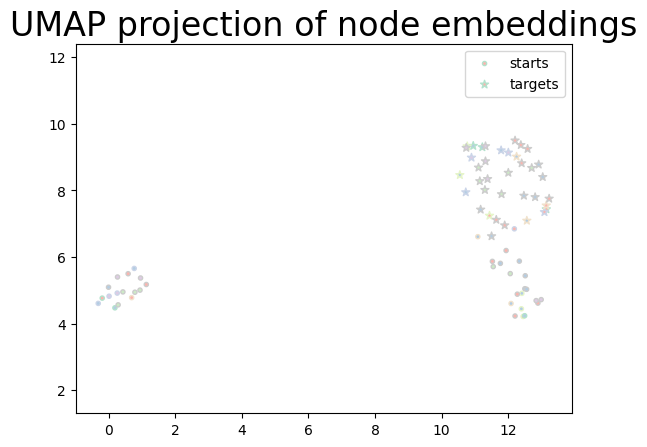

In [39]:
plt.scatter(
    embedding[len(c):, 0],
    embedding[len(c):, 1],
    c=c,
    edgecolors=edgecolors,
    marker='.', label="starts")

plt.scatter(
    embedding[:len(c), 0],
    embedding[:len(c), 1],
    c=c,
    edgecolors=edgecolors,
    marker='*', label="targets")

plt.gca().set_aspect('equal', 'datalim')
plt.legend()
plt.title('UMAP projection of node embeddings', fontsize=24)

In [7]:
station2nodes = defaultdict(list)

for node, station in nx.get_node_attributes(dataset.cg.graph, "station").items():
    station2nodes[station].append(node)

defaultdict(list,
            {0: [0, 7, 8],
             2: [1, 9, 10, 35, 36],
             4: [2, 11, 12],
             6: [3, 13, 14],
             18: [4, 15, 16],
             39: [5, 17, 18],
             59: [6, 19, 20],
             20: [21, 24, 25],
             22: [22, 26, 27, 33, 34],
             24: [23, 28, 29],
             42: [30, 31, 32]})

In [44]:
np.eye(10) * np.random.rand(10, 0, 10)

ValueError: operands could not be broadcast together with shapes (10,10) (10,0,10) 